Image Label :  5
(60000, 28, 28)
(10000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7174 - accuracy: 0.7613 - val_loss: 0.5314 - va

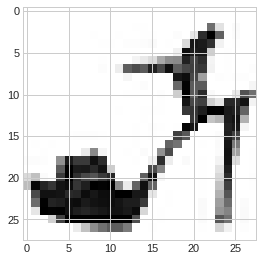

In [29]:
#import necessary python libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

#quick look at one of the sample images from the dataset
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label : ", ytrain[imgIndex])
plt.imshow(image)

#quick check of both training sets
print(xtrain.shape)
print(xtest.shape)

#build a neural network architecture with TWO hidden layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

#before taining model split the training and validation sets
xvalid, xtrain = xtrain[:5000] /255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

#train the neaural network for the task of Image Classification
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

#look at predictions
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

#take a look at predicted classes
classes = np.argmax(predictions, axis=1)
print(classes)